In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.datasets import mnist
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


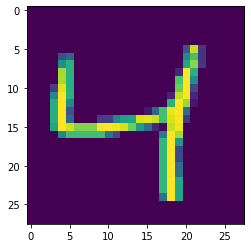

In [ ]:
plt.imshow(X_train_full[2])

In [ ]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test =X_test.reshape((10000,28,28,1))

In [ ]:
X_train_n = X_train_full/255.
X_test_n =X_test/255.

In [ ]:
X_valid,X_train =X_train_n[:6000],X_train_n[6000:]
y_valid,y_train = y_train_full[:6000],y_train_full[6000:]
X_test = X_test_n

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
Model_A = keras.models.Sequential()
Model_A.add(keras.layers.Conv2D(filters =32 ,kernel_size =(3,3),strides =1,padding ="valid",activation ='relu',input_shape =(28,28,1)))
Model_A.add(keras.layers.MaxPool2D(2,2))
Model_A.add(keras.layers.Flatten())
Model_A.add(keras.layers.Dense(200,activation ='relu'))
Model_A.add(keras.layers.Dense(100,activation ='relu'))
Model_A.add(keras.layers.Dense(10,activation ='softmax'))

In [ ]:
Model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 200)               1081800   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
## Compiling and the training the neural network
Model_A.compile(loss ="sparse_categorical_crossentropy",optimizer="sgd", metrics =["accuracy"])

In [ ]:
model_history = Model_A.fit(X_train , y_train, epochs =30, batch_size = 64 ,
                          validation_data = (X_valid,y_valid))

Epoch 1/30
844/844 [==============================] - 37s 43ms/step - loss: 0.7421 - accuracy: 0.8111 - val_loss: 0.2898 - val_accuracy: 0.9147
Epoch 2/30
844/844 [==============================] - 33s 39ms/step - loss: 0.2715 - accuracy: 0.9196 - val_loss: 0.2195 - val_accuracy: 0.9385
Epoch 3/30
844/844 [==============================] - 33s 39ms/step - loss: 0.2108 - accuracy: 0.9370 - val_loss: 0.1760 - val_accuracy: 0.9485
Epoch 4/30
844/844 [==============================] - 33s 40ms/step - loss: 0.1731 - accuracy: 0.9473 - val_loss: 0.1450 - val_accuracy: 0.9578
Epoch 5/30
844/844 [==============================] - 35s 41ms/step - loss: 0.1468 - accuracy: 0.9552 - val_loss: 0.1286 - val_accuracy: 0.9610
Epoch 6/30
844/844 [==============================] - 42s 49ms/step - loss: 0.1280 - accuracy: 0.9615 - val_loss: 0.1178 - val_accuracy: 0.9655
Epoch 7/30
844/844 [==============================] - 40s 47ms/step - loss: 0.1136 - accuracy: 0.9664 - val_loss: 0.1052 - val_accuracy:

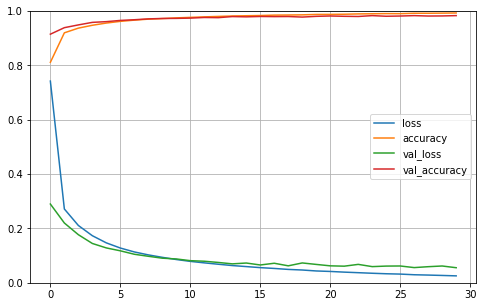

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
ev = Model_A.evaluate(X_test_n,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0551 - accuracy: 0.9816


In [ ]:
Model_B = keras.models.Sequential()
Model_B.add(keras.layers.Conv2D(filters =64 ,kernel_size =(3,3),strides =1,padding ="valid",activation ='relu',input_shape =(28,28,1)))
Model_B.add(keras.layers.MaxPool2D(2,2))
Model_B.add(keras.layers.Flatten())
Model_B.add(keras.layers.Dense(200,activation ='relu'))
Model_B.add(keras.layers.Dense(100,activation ='relu'))
Model_B.add(keras.layers.Dense(10,activation ='softmax'))

In [ ]:
Model_B.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               2163400   
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
## Compiling and the training the neural network
Model_B.compile(loss ="sparse_categorical_crossentropy",optimizer="sgd", metrics =["accuracy"])

In [ ]:
model_history = Model_B.fit(X_train , y_train, epochs =30, batch_size = 64 ,
                          validation_data = (X_valid,y_valid))

Epoch 1/30
844/844 [==============================] - 4s 4ms/step - loss: 0.6777 - accuracy: 0.8327 - val_loss: 0.2800 - val_accuracy: 0.9202
Epoch 2/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2667 - accuracy: 0.9210 - val_loss: 0.2194 - val_accuracy: 0.9377
Epoch 3/30
844/844 [==============================] - 3s 4ms/step - loss: 0.2104 - accuracy: 0.9365 - val_loss: 0.1781 - val_accuracy: 0.9500
Epoch 4/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1749 - accuracy: 0.9475 - val_loss: 0.1493 - val_accuracy: 0.9572
Epoch 5/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1492 - accuracy: 0.9555 - val_loss: 0.1346 - val_accuracy: 0.9618
Epoch 6/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1301 - accuracy: 0.9608 - val_loss: 0.1187 - val_accuracy: 0.9653
Epoch 7/30
844/844 [==============================] - 3s 4ms/step - loss: 0.1154 - accuracy: 0.9653 - val_loss: 0.1082 - val_accuracy: 0.9667
Epoch 

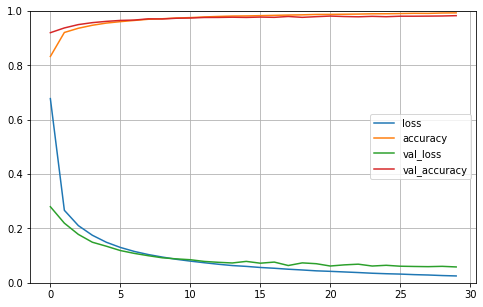

In [ ]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
ev = Model_B.evaluate(X_test_n,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.9829
